# Introducción.

PyTorch es una biblioteca de aprendizaje automático3 de código abierto basada en la biblioteca de Torch, utilizado para aplicaciones que implementan cosas como visión artificial y procesamiento de lenguajes naturales, principalmente desarrollado por el Laboratorio de Investigación de Inteligencia Artificial de Facebook (FAIR).

Pytorch es un software libre y de código abierto liberado bajo la Licencia Modificada de BSD. A pesar de que la interfaz de Python está más pulida y es el foco principal del desarrollo, PyTorch también tiene una interfaz en C++.

En este primer módulo se van a ver grandes pinceladas de esta librería exponiendo las ideas básicas de lo que se puede hacer con las herramientas que nos ofrece. Para ello, comenzamos a ver cómo poder generar tensores (son objetos similares a los narrays de numpy, pero con los cuales se puede trabajar en GPU, no ocurriendo lo mismo con los n-arrays de numpy) y posteriormente se verá cómo se pueden obtener valores de la derivada, cuestión esta última muy importante a la hora de hacer procesos de optimización.


## Los tensores.

Comenzamos viendo cómo poder construir tensores en Pytorch, lo primero que hacemos es importar la librería

In [1]:
import torch

In [2]:
# Para ver si podemos utilizar GPU
torch.cuda.is_available()

True

Como vemos en la salida anterior disponemos de la tarjeta gráfica y de cuda para poder trabajar sobre esta plataforma.

## Vectores unidimensionales en Pytorch

Vamos a trabajar en esta sección con Pandas y numpy y lo primero que hacemos es importar estas librerías

In [3]:
import torch
import numpy as np 
import pandas as pd

Creamos inicialmente un tensor de una sola dimensión de números enteros

In [4]:
int_to_tensor = torch.tensor([10,11,12,13])
print("Tipo de tensor después de la conversión: ", int_to_tensor.dtype)
print("Tipo de tensor después de la conversión: ", int_to_tensor.type())

Tipo de tensor después de la conversión:  torch.int64
Tipo de tensor después de la conversión:  torch.LongTensor


Si quisiéramos un tensor de tipo float, lo podemos hacer de las dos maneras siguientes:

In [5]:
float_to_tensor = torch.tensor([10.0, 11.0, 12.0, 13.0])
print("Tipo de tensor después de la conversión: ", float_to_tensor.dtype)
print("Tipo de tensor después de la conversión: ", float_to_tensor.type())

Tipo de tensor después de la conversión:  torch.float32
Tipo de tensor después de la conversión:  torch.FloatTensor


In [6]:
# O también
int_list_to_float_tensor = torch.FloatTensor([10, 11, 12, 13])
int_list_to_float_tensor.type()
print("Tipo de tensor después de la conversión: ", int_list_to_float_tensor.type())

Tipo de tensor después de la conversión:  torch.FloatTensor


Para hacer una redimensión del array, lo haremos con la propiedad view()

```{index} redimensión, view
```

In [7]:
reshaped_tensor = int_list_to_float_tensor.view(4, 1)
print("Tensor original: ", int_list_to_float_tensor)
print("Tensor redimensionado: ", reshaped_tensor)

Tensor original:  tensor([10., 11., 12., 13.])
Tensor redimensionado:  tensor([[10.],
        [11.],
        [12.],
        [13.]])


Al igual que ocurre con numpy, si no conocemos cómo que da una determinada dimensión podemos poner el valor de -1 para que se calcule de forma automática. Por ejemplo el problema anterior también se puede hacer así:

In [8]:
reshaped_tensor = int_list_to_float_tensor.view(-1, 1)
print("Tensor original: ", int_list_to_float_tensor)
print("Tensor redimensionado: ", reshaped_tensor)

Tensor original:  tensor([10., 11., 12., 13.])
Tensor redimensionado:  tensor([[10.],
        [11.],
        [12.],
        [13.]])


## Convertir numpy array a tensores.

En este apartado vamos a ver cómo podemos convertir un numpy array en un tensor, con el cual ya se podrás trabajar con él en GPU.

In [9]:
# Un numpy array a tensor
numpy_arr = np.array([10.0, 11.0, 12.0, 13.0])
from_numpy_to_tensor = torch.from_numpy(numpy_arr)

print("dtype del tensor: ", from_numpy_to_tensor.dtype)
print("dtype del tensor: ", from_numpy_to_tensor.type())

dtype del tensor:  torch.float64
dtype del tensor:  torch.DoubleTensor


Para hacer el camino recíproco, es decir pasar de tensor a numpy array

In [10]:
# Un tensor a un numpy array
tensor_to_numpy = from_numpy_to_tensor.numpy()
print("back a numpy desde tensor: ", tensor_to_numpy)
print("dtype del tensor convertido: ", tensor_to_numpy.dtype)

back a numpy desde tensor:  [10. 11. 12. 13.]
dtype del tensor convertido:  float64


## Convertir un pandas series a tensor.

En este caso lo que se debe hacer es pasar la serie de pandas a un numpy array, mediante la propiedad values y actuar como en el apartado anterior. 

In [11]:
pandas_series=pd.Series([1, 0.2, 3, 13.1])
store_with_numpy=torch.from_numpy(pandas_series.values)
print("Tensor almacenado como numpy array: ", store_with_numpy)
print("dtype de tensor: ", store_with_numpy.dtype)
print("type de tensor: ", store_with_numpy.type())

Tensor almacenado como numpy array:  tensor([ 1.0000,  0.2000,  3.0000, 13.1000], dtype=torch.float64)
dtype de tensor:  torch.float64
type de tensor:  torch.DoubleTensor


Además, el marco Pytorch nos permite hacer muchas más cosas con los tensores, como que su método item() devuelve un número de Python como un tensor y el tolist(), método que devuelve una lista.

In [12]:
new_tensor=torch.tensor([10, 11, 12, 13]) 
print("El segundo item es",new_tensor[1].item())
tensor_to_list=new_tensor.tolist()
print('Como tensor:', new_tensor,"\nComo lista:",tensor_to_list)

El segundo item es 11
Como tensor: tensor([10, 11, 12, 13]) 
Como lista: [10, 11, 12, 13]


## Indexación y slicing en tensores unidimensionales.

```{index} indexación, slicing
```

Las operaciones de indexación y slicing son casi las mismas en Pytorch que en Python. Por lo tanto, el primer índice siempre comienza en 0 y el último índice es menor que la longitud total del tensor. Use corchetes para acceder a cualquier número en un tensor.

In [13]:
tensor_index = torch.tensor([0, 1, 2, 3])
print("Valor en el índice 0:",tensor_index[0])
print("Valor en el ídice 3:",tensor_index[3])

Valor en el índice 0: tensor(0)
Valor en el ídice 3: tensor(3)


In [14]:
example_tensor = torch.tensor([50, 11, 22, 33, 44])
sclicing_tensor = example_tensor[1:4]
print("ejemplo de tensor : ", example_tensor)
print("subset del ejemplo del tensor:", sclicing_tensor)

ejemplo de tensor :  tensor([50, 11, 22, 33, 44])
subset del ejemplo del tensor: tensor([11, 22, 33])


In [15]:
print("valor del índice 3 del ejemplo del tensor:", example_tensor[3])
example_tensor[3] = 0 # Cambiamos el valor
print("nueo tensor:", example_tensor)

valor del índice 3 del ejemplo del tensor: tensor(33)
nueo tensor: tensor([50, 11, 22,  0, 44])


## Funciones para los tensores.

Existen una <a href="https://pytorch.org/docs/stable/torch.html" target="_blank"> serie de reducción de tensores </a> que los podemos encontrar en este enlace en el apartado *Reduction Ops*, algunas las vemos a continuación.

In [16]:
sample_tensor = torch.tensor([5, 4, 3, 2, 1])
min_value = sample_tensor.min()
max_value = sample_tensor.max()
print("Obtenemos el valor mínimo de un tensor: ", min_value)
print("Obtenemos el valor máximo de un tensor: ", max_value)

Obtenemos el valor mínimo de un tensor:  tensor(1)
Obtenemos el valor máximo de un tensor:  tensor(5)


También se puede calcular la media y la desviación estándar. Veamoslo:

In [17]:
mean_std_tensor = torch.tensor([-1.0, 2.0, 1, -2])
Mean = mean_std_tensor.mean()
print("La media del tensor es: ", Mean)
std_dev = mean_std_tensor.std()
print("La desviación estándar del tensor es: ", std_dev)

La media del tensor es:  tensor(0.)
La desviación estándar del tensor es:  tensor(1.8257)


In [18]:
a = torch.tensor([1, 3])
b = torch.tensor([2, 2])

add = a + b
multiply = a * b

print("addition of two tensors: ", add)
print("multiplication of two tensors: ", multiply)

addition of two tensors:  tensor([3, 5])
multiplication of two tensors:  tensor([2, 6])


También existe el método *torch.matmul*, cuyo comportamiento se puede ver <a href="https://pytorch.org/docs/stable/generated/torch.matmul.html" target="_blank"> en este enlace </a>.

## Tensores bidimensionales.

Veamos algunos ejemplo de generación de este tipo de elementos.

In [19]:
example_2D_list = [[5, 10, 15, 20],
                   [25, 30, 35, 40],
                   [45, 50, 55, 60]]
list_to_tensor = torch.tensor(example_2D_list)
print("El tensor 2D generado es el siguiente: ", list_to_tensor)

El tensor 2D generado es el siguiente:  tensor([[ 5, 10, 15, 20],
        [25, 30, 35, 40],
        [45, 50, 55, 60]])


In [20]:
print("Obteniendo el shape del tensor: ", list_to_tensor.shape)
print("Obteniendo el tamaño del tensor: ", list_to_tensor.size())
print("Obteniendo la dimensión del tensor: ", list_to_tensor.ndimension())

Obteniendo el shape del tensor:  torch.Size([3, 4])
Obteniendo el tamaño del tensor:  torch.Size([3, 4])
Obteniendo la dimensión del tensor:  2


## Conversión entre numpy arrays y tensores

In [21]:
# Convirtiendo un tensor 2_D en numpy array

twoD_tensor_to_numpy = list_to_tensor.numpy()
print("Convirtiendo un 2_D tensor en numpy array:")
print("Numpy array después conversión: ", twoD_tensor_to_numpy)
print("tipo datos después de la conversión: ", twoD_tensor_to_numpy.dtype)

print("***************************************************************")

# Recíproco: un numpy array a tensor

back_to_tensor = torch.from_numpy(twoD_tensor_to_numpy)
print("Convirtiendo un numpy array a tensor 2_D:")
print("Tensor después conversión:", back_to_tensor)
print("Tipo datos después conversión: ", back_to_tensor.dtype)

Convirtiendo un 2_D tensor en numpy array:
Numpy array después conversión:  [[ 5 10 15 20]
 [25 30 35 40]
 [45 50 55 60]]
tipo datos después de la conversión:  int64
***************************************************************
Convirtiendo un numpy array a tensor 2_D:
Tensor después conversión: tensor([[ 5, 10, 15, 20],
        [25, 30, 35, 40],
        [45, 50, 55, 60]])
Tipo datos después conversión:  torch.int64


## Conversión entre dataframes y tensores

In [22]:
# Convirtiendo Pandas Dataframe  a Tensor

dataframe = pd.DataFrame({'x':[22,24,26],'y':[42,52,62]})

print("Conversión Pandas a numpy: ", dataframe.values)
print("tipo de datos antes de la conversión conversion: ", dataframe.values.dtype)

print("***********************************************")

pandas_to_tensor = torch.from_numpy(dataframe.values)
print("Nuevo ensor: ", pandas_to_tensor)
print("Tipo de datos después de la conversión: ", pandas_to_tensor.dtype)

Conversión Pandas a numpy:  [[22 42]
 [24 52]
 [26 62]]
tipo de datos antes de la conversión conversion:  int64
***********************************************
Nuevo ensor:  tensor([[22, 42],
        [24, 52],
        [26, 62]])
Tipo de datos después de la conversión:  torch.int64


##  Indexación y slicin en 2_D

In [23]:
example_tensor = torch.tensor([[10, 20, 30, 40],
                               [50, 60, 70, 80],
                               [90, 100, 110, 120]])
print("Accediendo el 2 elemento de fila y columna: ", example_tensor[1, 1])
print("Otra forma de acceder: ", example_tensor[1][1])

print("********************************************************")

print("Accediendo al elemento de 3 fila y 4 columna: ", example_tensor[2, 3])
print("Otra forma: ", example_tensor[2][3])

Accediendo el 2 elemento de fila y columna:  tensor(60)
Otra forma de acceder:  tensor(60)
********************************************************
Accediendo al elemento de 3 fila y 4 columna:  tensor(120)
Otra forma:  tensor(120)


In [24]:
example_tensor = torch.tensor([[10, 20, 30, 40],
                               [50, 60, 70, 80],
                               [90, 100, 110, 120]])
print("Accediendo a dos primeros elementos segunda fila: ", example_tensor[1, 0:2])
print("Otra forma: ", example_tensor[1][0:2])

print("********************************************************")

print("Accediendo a tres primeros elementos tercera fila:: ", example_tensor[2, 0:3])
print("Otra forma: ", example_tensor[2][0:3])

Accediendo a dos primeros elementos segunda fila:  tensor([50, 60])
Otra forma:  tensor([50, 60])
********************************************************
Accediendo a tres primeros elementos tercera fila::  tensor([ 90, 100, 110])
Otra forma:  tensor([ 90, 100, 110])


## Cálculo de derivadas con Pytorch

En este apartado vamos a ver cómo calcular el valor de la derivada en un punto de una determinada función. En concreto lo vamos a hacer para la función $y=3 \cdot x^2$, cuya función derivada es $6 \cdot x$. 

```{index} requires_grad
```

Para calcular la derivada, debemos declarar una variable como tensor, pero utilizando el parámetro *requires_grad = True* para indicar a Pytorch que para esta variable se van a poder calcular los gradientes.

In [25]:
x = torch.tensor(3.0, requires_grad = True)
print("creando el tensor  x: ", x)

creando el tensor  x:  tensor(3., requires_grad=True)


Usaremos una ecuación simple como ejemplo 3x*2 y tomar la derivada con respecto a la variable x. Entonces, creemos otro tensor de acuerdo con la ecuación dada. Además, aplicaremos un método limpio .backwarden la variable yque forma un gráfico acíclico que almacena el historial de cálculo y evaluaremos el resultado con .grad el valor dado.

In [26]:
y = 3*x**2
print("El resultado de la ecuación es : ", y)
y.backward()
print("Derivada de la ecuación en x = 3 is: ", x.grad)

El resultado de la ecuación es :  tensor(27., grad_fn=<MulBackward0>)
Derivada de la ecuación en x = 3 is:  tensor(18.)


In [27]:
print('El dato del tensor:',x.data)
print('El dato de la derivada::',x.grad)
print('El dato de grad_fn::',x.grad_fn)
print("El tensor is_leaf?:",x.is_leaf)
print("El tensor tiene etributo requires_grad?:",x.requires_grad)

El dato del tensor: tensor(3.)
El dato de la derivada:: tensor(18.)
El dato de grad_fn:: None
El tensor is_leaf?: True
El tensor tiene etributo requires_grad?: True


In [28]:
print('El dato del tensor:',y.data)
print('El dato de la derivada:',y.grad)
print('El dato de grad_fn:',y.grad_fn)
print("El tensor is_leaf?:",y.is_leaf)
print("El tensor tiene etributo requires_grad?:",y.requires_grad)

El dato del tensor: tensor(27.)
El dato de la derivada: None
El dato de grad_fn: <MulBackward0 object at 0x000001FD8CE362C0>
El tensor is_leaf?: False
El tensor tiene etributo requires_grad?: True


C:\Users\Francisco\AppData\Local\Temp\ipykernel_13016\816567079.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:491.)
  print('El dato de la derivada:',y.grad)


In [29]:
# Calculamos la derivada con otra función
x = torch.tensor(3.0, requires_grad = True)
y = 6 * x ** 2 + 2 * x + 4
print("El resultado de la ecuación es: ", y)
y.backward()
print("La derivada en x = 3 es: ", x.grad)

El resultado de la ecuación es:  tensor(64., grad_fn=<AddBackward0>)
La derivada en x = 3 es:  tensor(38.)


## Cálculo de derivadas parciales en Pytorch

Similar al cálculo de derivadas para funciones de una sóla variable, lo podemos hacer para más de una variable, es decir para derivadas parciales. Veamos un ejemplo.

In [30]:
u = torch.tensor(3., requires_grad=True)
v = torch.tensor(4., requires_grad=True)

f = u**3 + v**2 + 4*u*v

print(u)
print(v)
print(f)

tensor(3., requires_grad=True)
tensor(4., requires_grad=True)
tensor(91., grad_fn=<AddBackward0>)


In [31]:
# Paso atras para el cálculo de la derivaad
f.backward()
print("Derivada parcial con respecto a u: ", u.grad)
print("Derivada parcial con respecto a v: ", v.grad)

Derivada parcial con respecto a u:  tensor(43.)
Derivada parcial con respecto a v:  tensor(20.)


## Derivada para múltiples valores

```{index} detach
```

Vamos a hacer una representación gráfica tanto de una función como de los valores de la derivada. Observar el uso de *detach* cuando un tensor está definido como *requires_grad = True*. Hay que dar este paso previo para pasarlo a un valor de tipo numpy y que así se pueda representar

```{index} sum()
```

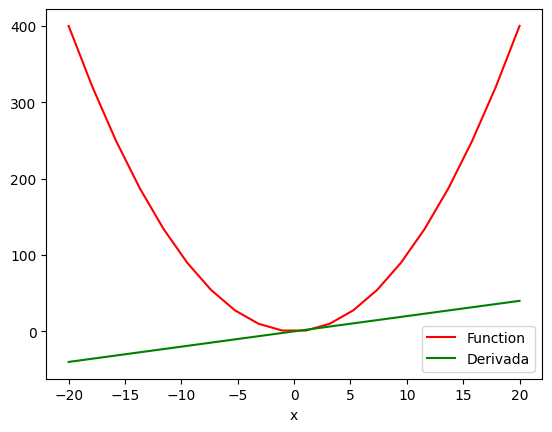

In [32]:
import matplotlib.pyplot as plt

# Calculamos la derivada para múltiples valores
x = torch.linspace(-20, 20, 20, requires_grad = True)
Y = x ** 2
y = torch.sum(Y) # hacer esto para calcular derivada
y.backward()
 
# Dibujamos la derivada y los valores de la función
function_line, = plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'Function')
function_line.set_color("red")
derivative_line, = plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'Derivada')
derivative_line.set_color("green")
plt.xlabel('x')
plt.legend()
plt.show()

Para obtener el gráfico anterior, hay que tener en cuenta que cómo lo hacemos si tenemos una función con múltiples valores y necesitamos calcular la derivada con respecto a sus múltiples valores.

Para hacer eso, haremos uso del atributo *sum*  para 
(1) producir una función de valor escalar, y luego 
(2) tomar la derivada. 

Así es como podemos ver el gráfico de 'función vs. derivada'.

Para un mayor entendimiento del paso backward <a href="https://medium.com/@monadsblog/pytorch-backward-function-e5e2b7e60140" target="_blank"> se recomienda ver este enlace </a>